## Introduction


### here we predict the level of solar radiation ,solar radiation or sunlight is general term for the elctomagnetic radiation emitted by the sun.solar radiation can be capture and turn into useful forms of ennergy. The datset contains column's Temperature,humidity,winddirection,speed,pressure.the dataset contain the measurement of 4 month


#### import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error as mae,mean_squared_error as mse


import re #for regular expression
import warnings
warnings.simplefilter('ignore')
import random
import datetime

In [3]:
df=pd.read_csv('SolarPrediction.csv')

## Exploratary Data analysis

In [3]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


here we explore the data column of given data in the given data ,seperate the year,month,and day

In [4]:
df['Month'] = df['Data'].apply(lambda x: re.search(r'^\d+', x).group(0)).astype(np.int)
df['Day'] = df['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(np.int)
df['Year'] = df['Data'].apply(lambda x: re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(np.int)

data = df.drop('Data', axis=1,inplace=True)


In [49]:
df.head(100)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day
0,1475229326,86126.0,1.21,48,30.46,59,177.39,5.62,9,29
1,1475229023,85823.0,1.21,48,30.46,58,176.78,3.37,9,29
2,1475228726,85526.0,1.23,48,30.46,57,158.75,3.37,9,29
3,1475228421,85221.0,1.21,48,30.46,60,137.71,3.37,9,29
4,1475228124,84924.0,1.17,48,30.46,62,104.95,5.62,9,29
...,...,...,...,...,...,...,...,...,...,...
95,1475200820,57620.0,310.59,59,30.43,58,27.34,9.00,9,29
96,1475200522,57322.0,230.26,59,30.43,46,359.93,3.37,9,29
97,1475200221,57021.0,623.31,60,30.43,46,22.18,7.87,9,29
98,1475199922,56722.0,312.10,60,30.43,48,4.38,10.12,9,29


## here we have column Year have the same value in whole column so we drop the year and we also drop TimeSunRise,and TimeSunse

In [6]:
df.drop(['TimeSunRise','TimeSunSet','Year'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  int64  
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   Month                   32686 non-null  int32  
 9   Day                     32686 non-null  int32  
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 2.2+ MB


## checking the missing value of givan data set

In [8]:
df.isna().sum()

UNIXTime                  0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
dtype: int64

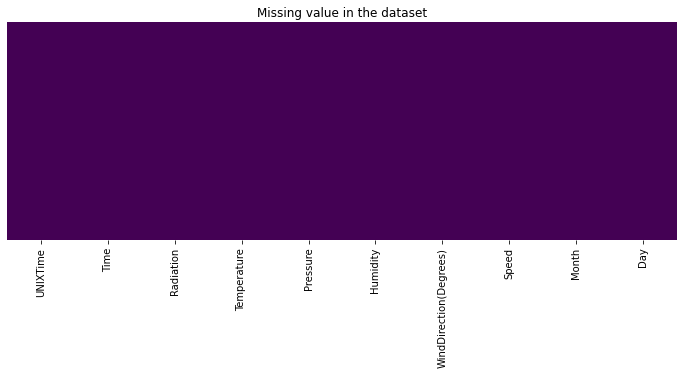

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');


#### we have not null values in  the given data set

### checking the correletion between the dependant and independant variable

In [10]:
df.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.968235,0.286457
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337
Month,0.968235,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027
Day,0.286457,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000


<AxesSubplot:>

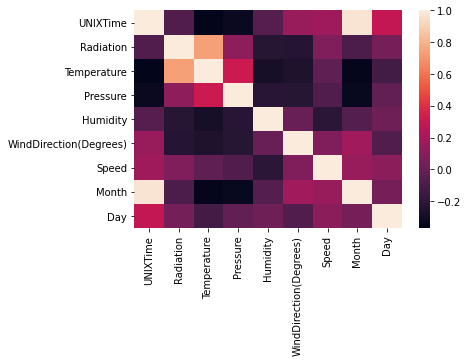

In [11]:
corr = df.corr()
sns.heatmap(corr)

In [12]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,15.825766
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,8.711824
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,1.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,9.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,16.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,23.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,31.000000


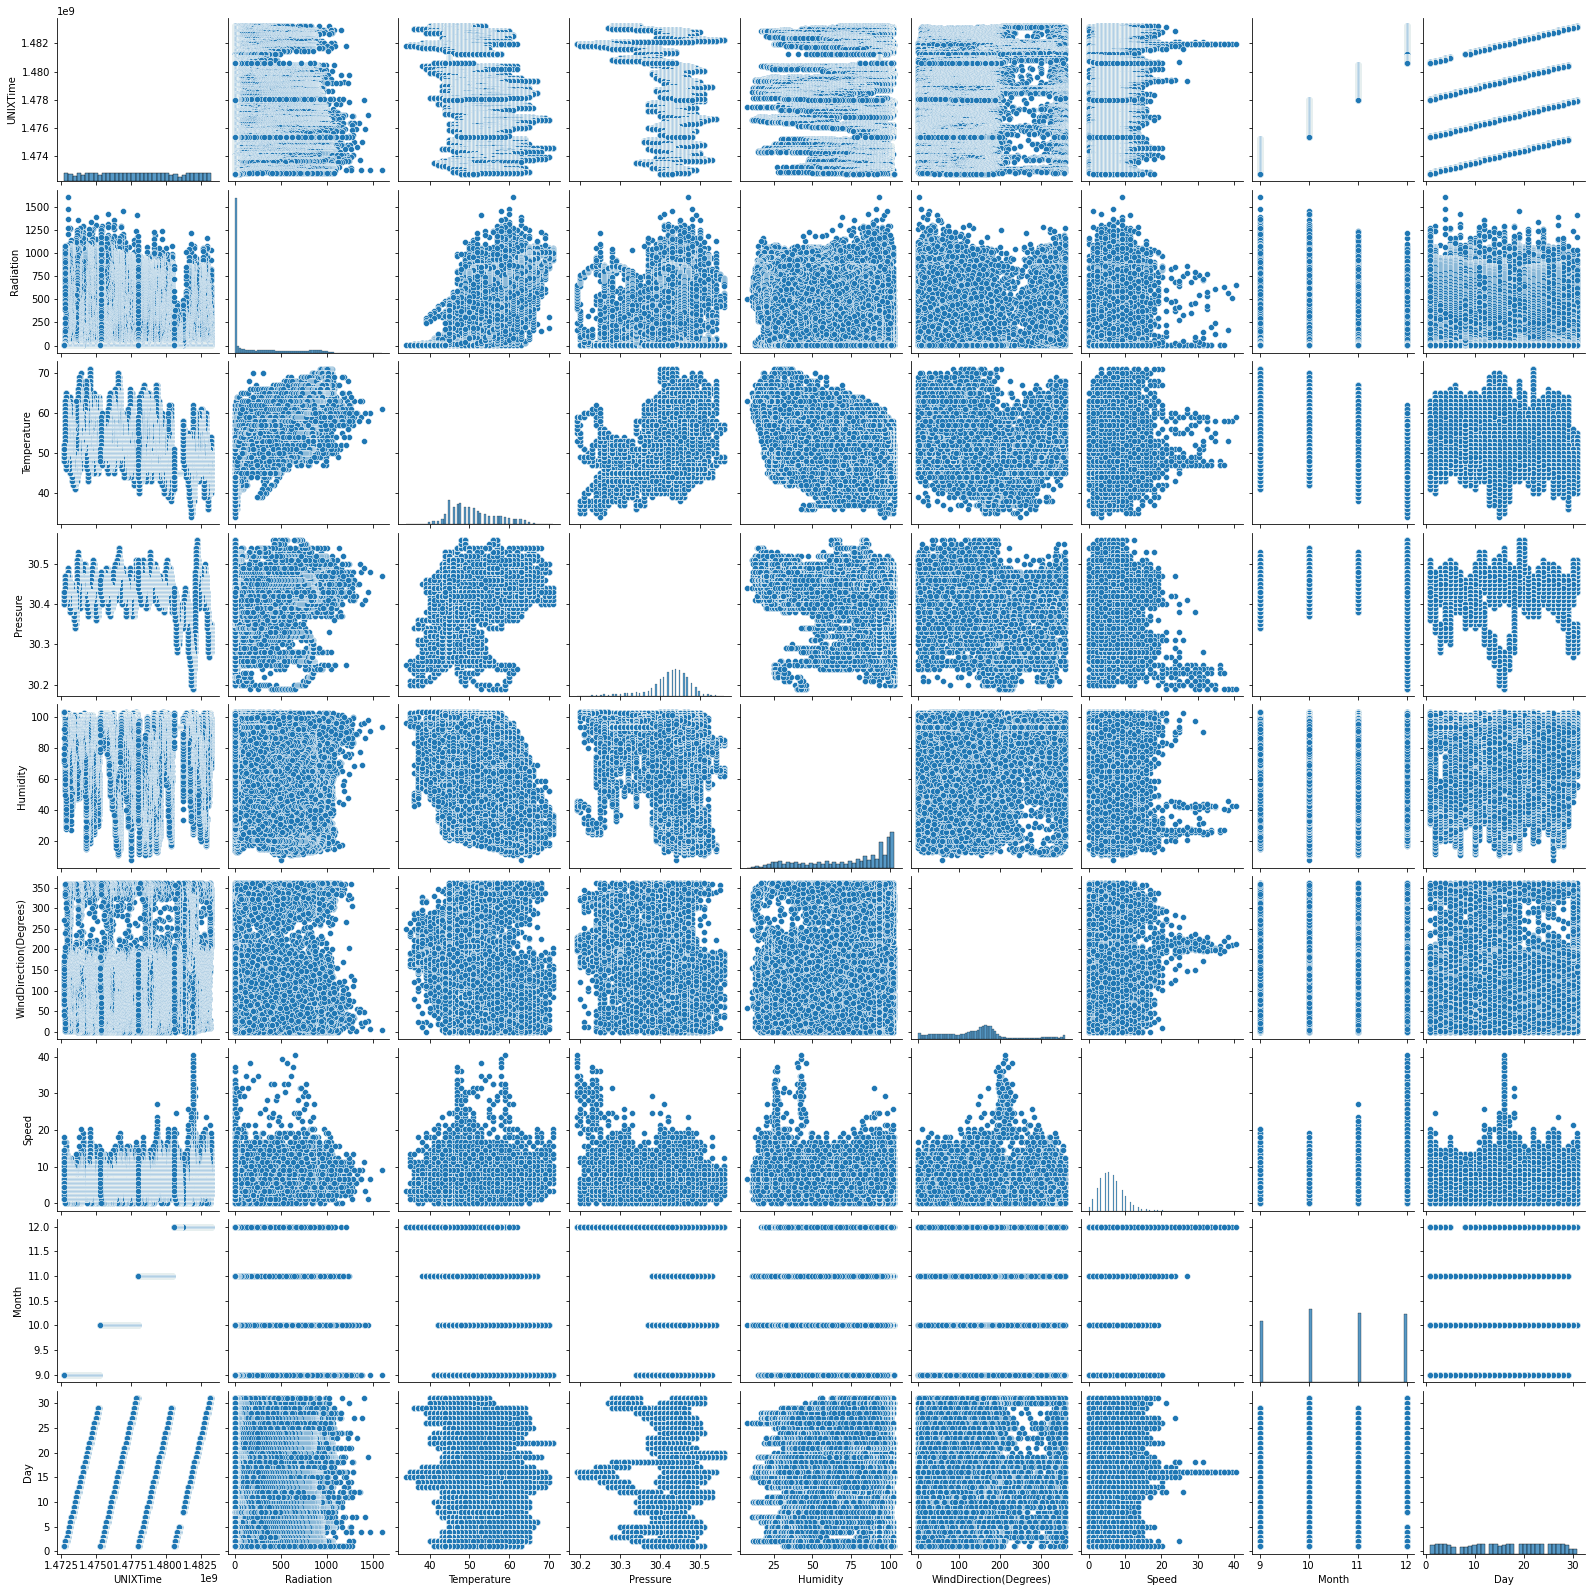

In [13]:
sns.pairplot(df)

### we have not good correletion between the depedant and independant variable only temperature has good correletion, so we avoide linear Regression model


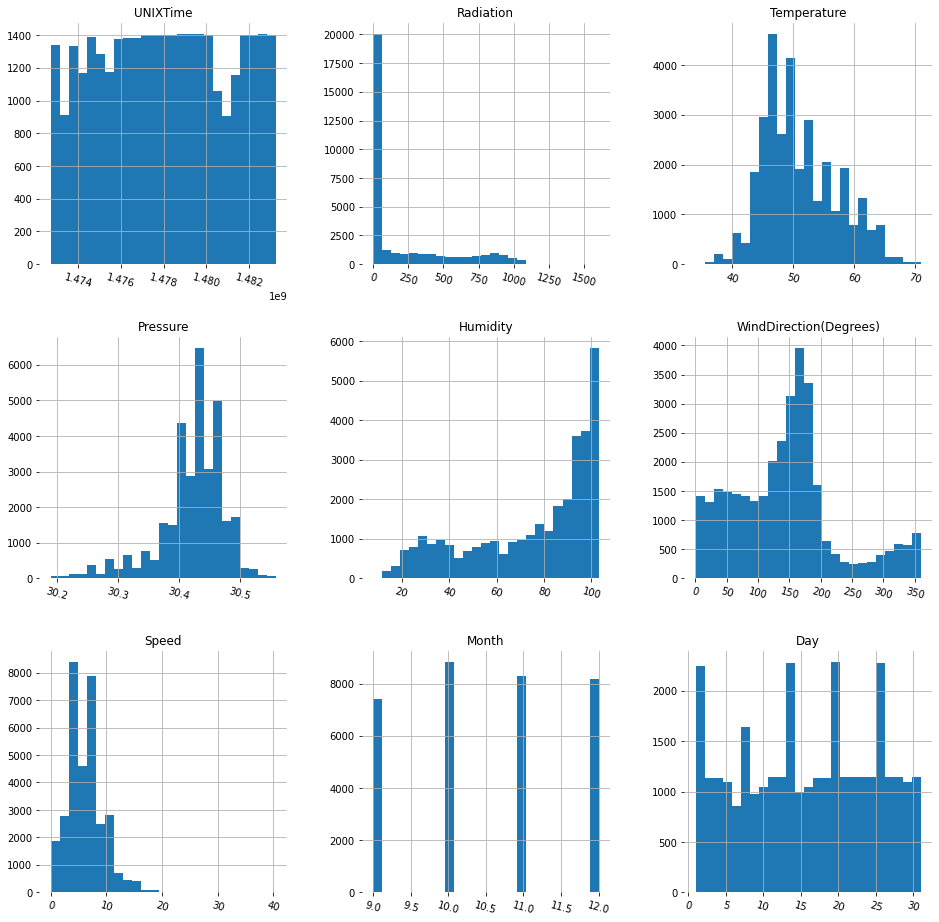

In [14]:
df1=df[['UNIXTime' ,'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed','Month','Day']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

## Visualisation 

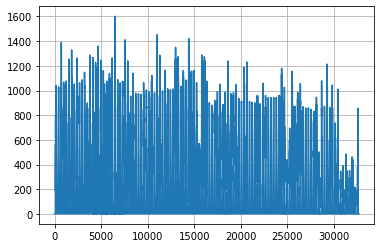

In [15]:
df['Radiation'].plot()
plt.grid(True)

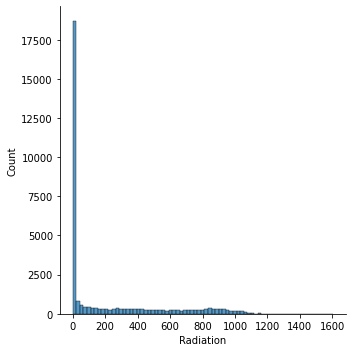

In [16]:
sns.displot(df['Radiation'])

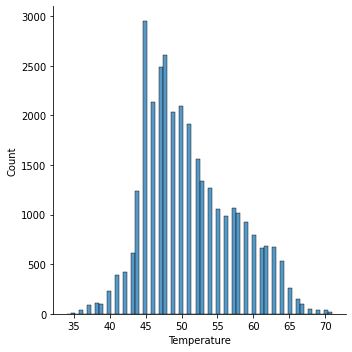

In [17]:
sns.displot(df['Temperature'])

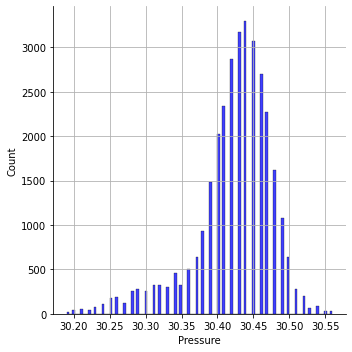

In [18]:
sns.displot(df['Pressure'],color='blue')
plt.grid(True)
plt.show()


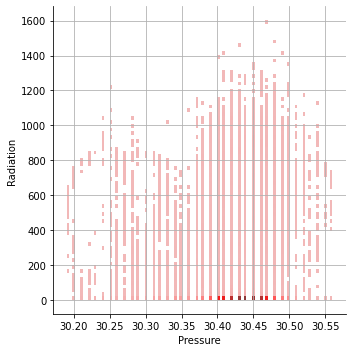

In [19]:
sns.displot(y=df['Radiation'],x=df['Pressure'],color='red')
plt.grid(True)
plt.show()

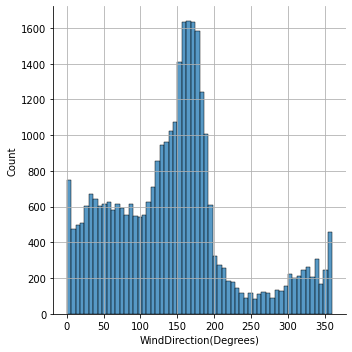

In [20]:
sns.displot(df['WindDirection(Degrees)'])
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Day', ylabel='Radiation'>

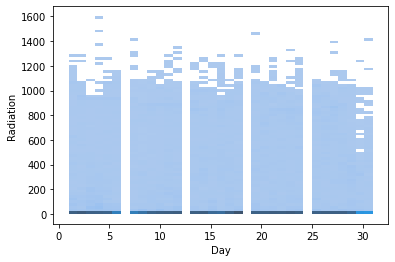

In [21]:
sns.histplot(y=df['Radiation'],x=df['Day'])

In [22]:
def time_to_seconds(s):
    dt = datetime.datetime.strptime(s, "%H:%M:%S") - datetime.datetime(1900,1,1)
    return dt.total_seconds()
df["Time"] = df["Time"].apply(time_to_seconds)

### change the format of time ,the time changing into second

### the data set seperate into the depedant and indepedant variable

In [23]:
y=df['Radiation']
x=df.drop('Radiation',axis=1)

In [25]:
x

,UNIXTime,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day
0,1475229326,86126.0,48,30.46,59,177.39,5.62,9,29
1,1475229023,85823.0,48,30.46,58,176.78,3.37,9,29
2,1475228726,85526.0,48,30.46,57,158.75,3.37,9,29
3,1475228421,85221.0,48,30.46,60,137.71,3.37,9,29
4,1475228124,84924.0,48,30.46,62,104.95,5.62,9,29
...,...,...,...,...,...,...,...,...,...
32681,1480587604,1204.0,44,30.43,102,145.42,6.75,12,1
32682,1480587301,901.0,44,30.42,102,117.78,6.75,12,1
32683,1480587001,601.0,44,30.42,102,145.19,9.00,12,1
32684,1480586702,302.0,44,30.42,101,164.19,7.87,12,1


In [26]:
x.drop('Time',axis=1,inplace=True)

### whole data set in that one way and the single unit ,for we use standard scalling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [28]:
x

array([[-0.93775298, -0.50043927,  0.67897416, ..., -0.17873758,
        -1.39153972,  1.51224763],
       [-0.93785381, -0.50043927,  0.67897416, ..., -0.82335911,
        -1.39153972,  1.51224763],
       [-0.93795264, -0.50043927,  0.67897416, ..., -0.82335911,
        -1.39153972,  1.51224763],
       ...,
       [ 0.84517269, -1.14549002, -0.05265751, ...,  0.78962722,
         1.34400291, -1.70182424],
       [ 0.84507319, -1.14549002, -0.05265751, ...,  0.46588396,
         1.34400291, -1.70182424],
       [ 0.84497336, -1.14549002,  0.1302504 , ..., -0.82335911,
         1.34400291, -1.70182424]])

In [30]:
df.dtypes

UNIXTime                    int64
Time                      float64
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int32
Day                         int32
dtype: object

### we use train,test ,split  the givan data seperate into train and test data here we get the test size=0.30 and take random_state=1

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

### Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [33]:
print(f"Accuracy-: {r2_score(ytest, ypred)}\n")


Accuracy-: 0.8357792014386665



In [34]:
print(f'MAE:{mae(ytest,ypred)}')
print(f'MSE:{mse(ytest,ypred)}')
print(f'RMSE:{np.sqrt(mse(ytest,ypred))}')

MAE:48.822716704058735
MSE:16357.442559820516
RMSE:127.8962179261784


### cross validation

In [35]:
cs=cross_val_score(dt,xtrain,ytrain,cv=10)
cs

array([0.80998874, 0.78547001, 0.85719481, 0.83418852, 0.83008777,
       0.84116429, 0.81367732, 0.85193473, 0.81757439, 0.82610155])

In [36]:
np.mean(cs)

0.8267382132983887

#### from decision tree we get the 0.83 accuracy  and after cross val score we get 0.82 accuracy

#### now we tunning the parameter to increasing accuracy for decision tree

In [37]:
para={'max_depth':[1,10,15,20,None],
    'min_samples_split':[2,4,6,10,None],
    'min_samples_leaf':[1,2,3,4,5,None],}

In [38]:
grid=GridSearchCV(dt,para,n_jobs=-1)

In [39]:
grid.fit(xtrain,ytrain)
ypred=grid.predict(xtest)

In [40]:
print(f"Accuracy-: {r2_score(ytest, ypred)}\n")

print(f'MAE:{mae(ytest,ypred)}')
print(f'MSE:{mse(ytest,ypred)}')
print(f'RMSE:{np.sqrt(mse(ytest,ypred))}')

Accuracy-: 0.8630385830832025

MAE:49.8601218471684
MSE:13642.23368632214
RMSE:116.79997297226632


### tunning the parameter we increasing accuracy 86%

### Random Forest

### here we create RandomForestRegressor model to solving the regression problem

In [41]:
rf= RandomForestRegressor(n_estimators=200)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [42]:

print(f"Accuracy-: {r2_score(ytest, ypred)}\n")

print(f'MAE:{mae(ytest,ypred)}')
print(f'MSE:{mse(ytest,ypred)}')
print(f'RMSE:{np.sqrt(mse(ytest,ypred))}')

Accuracy-: 0.9156145614012692

MAE:42.26597514276973
MSE:8405.32975637963
RMSE:91.68058549322005


In [51]:
cs=cross_val_score(rf,xtrain,ytrain,cv=10)
np.mean(cs)

0.908212407321505

#### here we get 91% accuracy help of random forest and cross val score is 82.

In [44]:
param_grid = {'n_estimators': np.arange(200,400, 10),
              'max_depth': np.arange(4, 21),
              'min_samples_split': [0.001, 0.01, 0.1, 2],
              'min_samples_leaf': [0.001, 0.01, 0.1, 1],
              'max_features': np.arange(3, 7), 
              'n_jobs': [-1]
              }

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=25, scoring='neg_mean_squared_error', n_jobs=-1, refit=True)
random_search.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'max_features': array([3, 4, 5, 6]),
                                        'min_samples_leaf': [0.001, 0.01, 0.1,
                                                             1],
                                        'min_samples_split': [0.001, 0.01, 0.1,
                                                              2],
                                        'n_estimators': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
       330, 340, 350, 360, 370, 380, 390]),
                                        'n_jobs': [-1]},
                   scoring='neg_mean_squared_error')

In [45]:
ypred=random_search.predict(xtest)

In [46]:
print(f"Accuracy-: {r2_score(ytest, ypred)}\n")

print(f'MAE:{mae(ytest,ypred)}')
print(f'MSE:{mse(ytest,ypred)}')
print(f'RMSE:{np.sqrt(mse(ytest,ypred))}')

Accuracy-: 0.8771221339803208

MAE:62.15750915729886
MSE:12239.421881385733
RMSE:110.63192071633635


In [50]:
cs=cross_val_score(rf,xtrain,ytrain,cv=10)
np.mean(cs)

0.9085783145851328